In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_tour_pass_review = db['data_tour_pass_review']
data_tour_pass_review = collection_tour_pass_review.find()
df_tour_pass_review = pd.DataFrame(data_tour_pass_review)
collection_tour_pass_review_tmon = db['data_tour_pass_review_tmon']
data_tour_pass_review_tmon = collection_tour_pass_review_tmon.find()
df_tour_pass_review_tmon = pd.DataFrame(data_tour_pass_review_tmon)

In [2]:
df_review = pd.concat(objs=[df_tour_pass_review,df_tour_pass_review_tmon])
df_review.head()

,_id,title,region,rating,date,content
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...


In [3]:
# 결측치 확인
df_review.isnull().sum()

_id        0
title      0
region     0
rating     0
date       0
content    5
dtype: int64

In [4]:
# 결측치 제거
df_review = df_review.dropna()
df_review.isnull().sum()

_id        0
title      0
region     0
rating     0
date       0
content    0
dtype: int64

In [5]:
def datetime(text):
    text = text.replace('.', '')
    date = pd.to_datetime(text, format='%y%m%d')
    return date
df_review["datetime"] = df_review['date'].apply(datetime)
df_review

,_id,title,region,rating,date,content,datetime
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,2024-03-24
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,2024-04-29
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,2024-04-24
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,2024-04-15
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,2024-05-02
...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,2024-04-25
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,2024-04-18
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,2024-03-24
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,2024-03-07


In [11]:
# 텍스트 파일 경로
file_path = '../sample_labeling.txt'

# 텍스트 파일 읽기
with open(file_path, 'r') as file:
    read_data = file.read()

In [33]:
import pandas as pd
from io import StringIO
# 텍스트 데이터를 파일 객체로 변환
file_obj = StringIO(read_data)
file_obj
# 데이터프레임 생성
df_labeled = pd.read_csv(file_obj, sep='\t')
df_labeled

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
199997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [36]:
df_labeled.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [40]:
df_labeled = df_labeled.dropna()
df_labeled

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
199997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [41]:
from sklearn.model_selection import train_test_split
labeled_x = df_labeled['document']
labeled_y = df_labeled['label']
labeled_x_train,labeled_x_test = train_test_split(labeled_x,test_size=0.3,random_state=42)
labeled_y_train,labeled_y_test = train_test_split(labeled_y,test_size=0.3,random_state=42)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
labeled_x_train = tfidfVectorizer.fit_transform(labeled_x_train)
labeled_x_test = tfidfVectorizer.transform(labeled_x_test)
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 00', '00 각성하시길', ..., '不好', '不好 가을남산은참예쁘다', '紐⑦넗濡쒕씪異⑹쟾濡'],
      dtype=object)

In [43]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)
classification_topic.fit(labeled_x_train, labeled_y_train)

RandomForestClassifier(n_jobs=-1)

In [44]:
# classification_report로 model 성능 확인
labeled_y_train_predict = classification_topic.predict(labeled_x_train)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69886
           1       0.99      1.00      0.99     70108

    accuracy                           0.99    139994
   macro avg       0.99      0.99      0.99    139994
weighted avg       0.99      0.99      0.99    139994



In [45]:
labeled_y_test_predict = classification_topic.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     30110
           1       0.76      0.83      0.79     29888

    accuracy                           0.78     59998
   macro avg       0.78      0.78      0.78     59998
weighted avg       0.78      0.78      0.78     59998



In [46]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()
logisticRegression.fit(labeled_x_train,labeled_y_train)

LogisticRegression()

In [47]:
labeled_y_train_predict = logisticRegression.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     69886
           1       0.94      0.94      0.94     70108

    accuracy                           0.94    139994
   macro avg       0.94      0.94      0.94    139994
weighted avg       0.94      0.94      0.94    139994



In [48]:
labeled_y_test_predict = logisticRegression.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     30110
           1       0.82      0.78      0.80     29888

    accuracy                           0.81     59998
   macro avg       0.81      0.81      0.81     59998
weighted avg       0.81      0.81      0.81     59998



In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(labeled_x_train, labeled_y_train)

KNeighborsClassifier()

In [50]:
labeled_y_train_predict = knn.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     69886
           1       0.68      0.78      0.73     70108

    accuracy                           0.71    139994
   macro avg       0.71      0.71      0.71    139994
weighted avg       0.71      0.71      0.71    139994



In [51]:
labeled_y_test_predict = knn.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52     30110
           1       0.56      0.66      0.61     29888

    accuracy                           0.57     59998
   macro avg       0.57      0.57      0.57     59998
weighted avg       0.57      0.57      0.56     59998



In [52]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(labeled_x_train, labeled_y_train)

SVC()

In [53]:
labeled_y_train_predict = svm_model.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     69886
           1       0.99      0.99      0.99     70108

    accuracy                           0.99    139994
   macro avg       0.99      0.99      0.99    139994
weighted avg       0.99      0.99      0.99    139994



In [54]:
labeled_y_test_predict = svm_model.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     30110
           1       0.80      0.85      0.82     29888

    accuracy                           0.82     59998
   macro avg       0.82      0.82      0.82     59998
weighted avg       0.82      0.82      0.82     59998



In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import load_iris

# # 탐색할 하이퍼파라미터 설정
# param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# # 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
# grid_search = GridSearchCV(logisticRegression, param_grid, cv=5)
# grid_search.fit(labeled_x_train, labeled_y_train)

# # 최적의 하이퍼파라미터 출력
# print("최적 하이퍼파라미터:", grid_search.best_params_)

# # 최적의 모델로 예측
# logistic_best_model = grid_search.best_estimator_       

In [ ]:
# labeled_y_test_predict = logistic_best_model.predict(labeled_x_test)
# from sklearn.metrics import classification_report
# print(classification_report(labeled_y_test, labeled_y_test_predict))

## 감성분석 적용 데이터 분석

In [8]:
df_review

,_id,title,region,rating,date,content,datetime
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,2024-03-24
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,2024-04-29
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,2024-04-24
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,2024-04-15
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,2024-05-02
...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,2024-04-25
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,2024-04-18
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,2024-03-24
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,2024-03-07


In [9]:
df_review["datetime"].dt.year.unique()

array([2024, 2023, 2022, 2021], dtype=int32)

In [10]:
print(len(df_review[df_review["datetime"].dt.year == 2021].query("sentiment == 1")),len(df_review[df_review["datetime"].dt.year == 2021].query("sentiment == 0")))
print(len(df_review[df_review["datetime"].dt.year == 2022].query("sentiment == 1")),len(df_review[df_review["datetime"].dt.year == 2022].query("sentiment == 0")))
print(len(df_review[df_review["datetime"].dt.year == 2023].query("sentiment == 1")),len(df_review[df_review["datetime"].dt.year == 2023].query("sentiment == 0")))
print(len(df_review[df_review["datetime"].dt.year == 2024].query("sentiment == 1")),len(df_review[df_review["datetime"].dt.year == 2024].query("sentiment == 0")))

UndefinedVariableError: name 'sentiment' is not defined

In [ ]:
list_year = ["2021", "2022", "2023", "2024"]
list_positive = [len(df_review[df_review["datetime"].dt.year == 2021].query("sentiment == 1"))
                 ,len(df_review[df_review["datetime"].dt.year == 2022].query("sentiment == 1"))
                      ,len(df_review[df_review["datetime"].dt.year == 2023].query("sentiment == 1"))
                      ,len(df_review[df_review["datetime"].dt.year == 2024].query("sentiment == 1"))]
list_negative = [len(df_review[df_review["datetime"].dt.year == 2021].query("sentiment == 0"))
                 ,len(df_review[df_review["datetime"].dt.year == 2022].query("sentiment == 0"))
                      ,len(df_review[df_review["datetime"].dt.year == 2023].query("sentiment == 0"))
                      ,len(df_review[df_review["datetime"].dt.year == 2024].query("sentiment == 0"))]

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(list_year, list_positive, marker='o', label='Positive') 
plt.plot(list_year, list_negative, marker='s', label='Negative')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency by Year')
plt.legend() #범례
plt.show()

NameError: name 'list_year' is not defined

<Figure size 1000x600 with 0 Axes>

연도별로 긍정적인 리뷰가 부정적인 리뷰에 비해 압도적으로 많음.

### (2) 별점별 토픽 키워드 추출
- 긍정적인 토픽들은 마케팅 방안으로 사용하기 위함
- 부정적인 토픽들에 대한 개선점을 찾고 보완하기 위함

In [6]:
df_review

,_id,title,region,rating,date,content,datetime
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,2024-03-24
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,2024-04-29
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,2024-04-24
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,2024-04-15
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,2024-05-02
...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,2024-04-25
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,2024-04-18
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,2024-03-24
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,2024-03-07


In [37]:
score_one = df_review.query("rating == 1")["content"].to_list()
score_two = df_review.query("rating == 2")["content"].to_list()
score_three = df_review.query("rating == 3")["content"].to_list()
list_positive = df_review.query("rating in [4,5]")

In [38]:
list_positive

,_id,title,region,rating,date,content,datetime
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,"남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해야할지 막막했는데 우연히 발견한 여수투어패스 덕분에 알찬 여행 했습니다. 저희는 2박3일 일정이였지만 제대로 즐길 시간은 하루였기에 12시간 권으로 구매를 했고 정말 열심히 돌아 다닌듯 합니다. 무료 또는 할인으로 입장하거나 먹을수 있는 곳들이 많아 커피를 좋아하는 우리에겐 더없이 좋은 투어패스 였네요\n저희가 방문한 곳을 몇군데 알려드리자면 \n까페퍼즈 브런치 -아메리카노와 카스테라 빵으로 아침 해결\n위드스페이스 구경하기 - 사진찍기 좋은 곳\n여수딸기모찌-딸기모찌먹기, \n테디베어뮤지엄- 들렀지만 휴관이라 못보고, \n오매- 당근케익과 유자케익(테디베어뮤지엄에서 내려오다보면 있어 바로 들름) \n여수갓당- 갓빵세트 \n김경오파티쓰리- 아메리카노와 딸기라떼 \n라테라스 스프링페스타-(투어패스 없이도 무료입장이 가능했네요) 미리 연락해 보고 방문하세요~~\n까페US - 아메리카노와 라떼 \n까지 알차게 방문하고 먹고 했습니다. ^^ 크루즈도 타려고 마음먹었지만 저희가 간 그 시점에 크루즈 운행 점검을 해서 타지를 못해 너무 아쉬웠네요 처음엔 저런걸 왜사지?? 하던 남편이 너무 잘 구매했다며 알차게 놀았다며 좋아 하네요 완전 추천합니다. ^^",2024-03-24
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이 제대로 표기가 안되서 헛걸음한곳이 좀 있네요. 여러명이 같이가는경우 표를 따로따로 구매하는게 좋을듯 합니다. 이순신광장에서 먹거리를 투어패스로 먹을려니 1시간 간격이 너무 기네요. 시간이 많을때는 괜찮겠지만 1박 2일 여행에 한곳에서 오래보낼수가 없네요\n생각보다 일찍 문닫는 곳도 많네요. 시간 계획 잘 세우세요,2024-04-29
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 11곳 다녀왔고 하나는 사진이커서 안올라가지고 두곳은 그냥 다녀왔습니다.\n순천487같은경우는 주말 공휴일은 안받는다고해요. 잘못읽은건지 제대로 된 설명이 안된건지... \n야무지게 12시간 11곳 잘 다녀갑니다. ^^,2024-04-24
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어요ㅜㅜ\n여기저기 구경하다 아이스크림옥 에서 아이스크림 먹었고요 투어패스 전용컵이 있더라고요 본사이즈보단 좀 작은듯 하지만 맛있고 친절 하셨고\n바른생활가서 구경도 하고 뽑기하고 공기도 사왔고요\n시내에서 더 구경하고 쓰려고 했으나 주말이라 사람이 너무 많아서 주차도 힘들고 기다리다 지치겠더라고요 그래서 좀 떨어진 테디베어박물관 구경하고 남해쪽으로 넘어 갔어요\n주말 아니라면 알뜰하게 구경 하기 좋은것 같아요~~,2024-04-15
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말에는 이용이안되더라구요ㅠ 한시간 기다린다고 좀 힘들었네요 카페 쿠키 테디베어 녹테마레밖에 이용못하여서 아쉬웠어요,2024-05-02
...,...,...,...,...,...,...,...
27773,663e0844ae72dcb13c54532b,[비짓강릉] 삼척투어패스 프로모션 핫플레이스 해상케이블카 하이원추추파크 종합박물관,강원,5,24.04.13.,즐겁게놀았어요 봄제대로 만끽,2024-04-13
27774,663e0844ae72dcb13c54532c,[비짓강릉] 삼척투어패스 프로모션 핫플레이스 해상케이블카 하이원추추파크 종합박물관,강원,5,24.04.22.,가성비 너무 좋았어요^^\n주변에도 추천해줄려요!,2024-04-22
27775,663e084aae72dcb13c54532d,[강원] 속초투어패스 강원도여행 국내여행지 패키지여행 켄싱턴리조트 해피아울하우스 중앙시장,강원,5,23.08.17.,안그래도 두 군데 가려던 참에 우연히 발견하고 저렴하게 잘 다녀왔습니다. 개구리들 너무 귀엽고 먹이주기 체험도 좋았어요. 만족합니다.,2023-08-17
27777,663e084aae72dcb13c54532f,[강원] 속초투어패스 강원도여행 국내여행지 패키지여행 켄싱턴리조트 해피아울하우스 중앙시장,강원,4,22.01.06.,이용하는 사람이 6개월만에 처음이래요\n나도 당황 ㅎ,2022-01-06


In [39]:
# 불용어 리스트 생성
stopwords = ['가', '고', '을', '를', '이', '는', '은']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토크나이징 함수 정의
# 한글자 이상이고 명사인 단어만 추출
def tokenizer(raw, pos=["Noun"], stopword=stopwords):
    return [
        '가성비' if word == '가성' else word
        for word, tag in okt.pos(
            raw, 
            norm=True,   
            stem=True    
            )
            if len(word) > 1 and tag in pos and word not in stopword
    ]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_positive['content'])
features.toarray()

from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=3, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육
dictionary_list = vectorizer.get_feature_names_out()
lda_model.components_

topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당
# df_topics_score['sentences'] = list_positive
# df_topics_score

## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)
topics_list_add = [['Topic1', 'Topic2', 'Topic3'],topics_list]
df_topics_list_positive = pd.DataFrame(topics_list_add)
df_topics_list_positive = df_topics_list_positive.T
df_topics_list_positive


/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


여행 가성비 패스 최고 투어 제주 아주 덕분 추천 아이
사용 커피 카페 완전 만족 정말 군데 상품 체험 가격
이용 다음 가격 체험 제주도 구매 가족 강추 아이 활용


,0,1
0,Topic1,여행 가성비 패스 최고 투어 제주 아주 덕분 추천 아이
1,Topic2,사용 커피 카페 완전 만족 정말 군데 상품 체험 가격
2,Topic3,이용 다음 가격 체험 제주도 구매 가족 강추 아이 활용


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
df_topics_list_positive = df_topics_list_positive.T
df_topics_list_positive


,0,1,2
0,Topic1,Topic2,Topic3
1,여행 가성비 패스 최고 투어 제주 아주 덕분 추천 아이,사용 커피 카페 완전 만족 정말 군데 상품 체험 가격,이용 다음 가격 체험 제주도 구매 가족 강추 아이 활용


In [44]:
df_topics_0

,index,score,3
0,4169,1498.901691,이용
1,1010,741.497574,다음
2,3,460.295137,가격
3,5130,330.294759,체험
4,4664,320.077789,제주도
...,...,...,...
6195,965,0.333842,늘봄
6196,6135,0.333842,횟집
6197,4443,0.333808,장안
6198,2259,0.333792,베이글


In [45]:
df_datas_0

[array([ 3.10153485, 33.86976364,  0.34592324, ...,  4.05383984,
         0.35319343,  0.85577617]),
 array(['가가', '가게', '가겍', ..., '힐링', '힐스', '힘들엇네용'], dtype=object)]

In [46]:
list_topics = []
for i in range(len(lda_model.components_)):
    df_datas_0 = [lda_model.components_[i], dictionary_list]
    df_topics_0 = pd.DataFrame(data=df_datas_0).T
    df_topics_0 = df_topics_0.dropna()
    df_topics_0 = df_topics_0.sort_values(0, ascending=False).reset_index()
    df_topics_0.rename(columns = {1 : i+1}, inplace = True)
    df_topics_0.rename(columns = {0 : 'score'}, inplace = True)
    list_topics.append(df_topics_0.loc[:4,['score',i+1]])
df_topic = pd.concat(list_topics,axis=1)
df_topic

,score,1,score,2,score,3
0,1308.934733,여행,1100.278454,사용,1497.649453,이용
1,1156.847129,가성비,429.120132,커피,741.406229,다음
2,952.677162,패스,347.50576,카페,469.748194,가격
3,825.327999,최고,297.946605,완전,318.495417,체험
4,721.589977,투어,285.954075,만족,317.300436,제주도


In [47]:
# grid_best_model.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)

In [48]:
topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(topics_output)
df_topics_score['dominant_topic_number']=np.argmax(topics_output, axis=1)
df_topics_score['dominant_topic_number'].value_counts()

dominant_topic_number
0    11386
1     8690
2     6890
Name: count, dtype: int64

In [71]:
list_positive.loc[:,'content_topic'] = df_topics_score['dominant_topic_number']
list_positive_2 = list_positive.query("content_topic==2")
list_positive_1 = list_positive.query("content_topic==1")
list_positive_0 = list_positive.query("content_topic==0")
list_positive_0.query("content.str.contains('체험')")


,_id,title,region,rating,date,content,datetime,content_topic
56,663dea3c06635b047a688c8d,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.02.12.,여수투어패스로 여수여행 하시면 좋아요!! 다음에도 여수여행 간다면 여수투어패스로~ 맛보기체험할듯,2024-02-12,0.0
71,663dea3e06635b047a688c9c,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.12.,저렴한 가격으로 여수 여기저기 탐방이 가능해서 너무 좋았어요! 이거 몰랐울땐 계획짤 때 어디가지 막막했었는데 이거 위주로 하자마자 갈 곳이 많이 생겨서 일정짜기도 쉽고 무료로 먹고 체험할 수 있는게 많아서 완전 알차게 여행할 수 있었습니다!,2024-01-12,0.0
96,663dea4006635b047a688cb5,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.12.,"사진을 많이 못 찍었지만 정말 알차게 잘 다녀왔습니다! 세계수석박물관, 여수낭만힐링요트 체험도 하구요~ 아이스크림옥에서 젤라또, 여수딸기모찌도 먹어보구요~ㅎㅎ\n순천만습지나 국가정원입장료 등이 포함되면 좋겠다는 아쉬움은 좀 있었지만, 국가정원은 휴장이라서 못 갔고 순천만 습지는 입장료가 아깝지 않을 만큼 좋았습니다~ \n여행계획 있으시면 여수순천패스 추천드려요!",2024-01-12,0.0
173,663dea4706635b047a688d02,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,23.12.27.,"뭐 ,\n투어패스는 언제나\n여행을 풍요롭게 만들어주네요~\n먹는것도, 체험하는것도\n안할 이유가없습니다!!!",2023-12-27,0.0
229,663dea4d06635b047a688d3a,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,23.12.11.,여수투어패스로 체험 및 음료를 먹을수 있어서 좋았어요!! 가족여행으로 여수투어패스 할인받아서 3인가족 25만원 정도 절약했네요,2023-12-11,0.0
...,...,...,...,...,...,...,...,...
26261,663e063454cce6034e0b84aa,제주타임패스 제주도 여행 프리패스 이용권 테마파크 박물관 족욕 감귤 요트 승마 체험,제주,5,24.02.25.,제주타임패스 제주도 여행 프리패스 이용권 테마파크 박물관 족욕 감귤 요트 승마 체험\n이용권선택: 제주타임패스 48시간 초특가 구매했어요\n계획을 잘 짜서 동선대로 움직이면 따로 입장권을 구매하는 것보다 훨씬 저렴하게 이용 할 수 있어요\n48시간 동안 알차게 사용해서 만족합니다\n감귤따기 체험도 하고 싶었지만 감귤 소진으로 하지 못해서 조금 아쉬웠습니다,2024-02-25,0.0
26306,663e063854cce6034e0b84d7,제주타임패스 제주도 여행 프리패스 이용권 테마파크 박물관 족욕 감귤 요트 승마 체험,제주,5,24.02.20.,시간제한없이 계속 이동할 수 잇어서 좋았습니다\n가격에 비해 체험할 수 있는게 많아서 더 유용하게 잘 썼습니다!,2024-02-20,0.0
26450,663e066154cce6034e0b8567,제주 반려견 동반 여행 댕댕투어패스 제주도 강아지 관광지 카페 핫플 체험,제주,5,23.01.16.,좋아요. 울 애기랑 좋은데 많이 갔어요^^ 너무 뽕 뽑아서? 좀 죄송스럽네요. 파더스가든 특히 좋았어요. 귤 따기 체험이 따로 신청 안해도요. 입장하니까 가위를 쥐어주셔요. 그래서 저도 몇개 따서 앉아서 먹었어요. 이때 눈이 많이 왔었나? 땅이 축축 해서 개가 걷지는 못 했어요. 닥스훈트라 키가 작아서 배가 다 젖어버리거든요. 계속 제가 안고 다녔는데요. 그래도 좋았어요^^\n아! 저기 벤치 위에 저 귤이 제가 딴 귤이예요ㅎㅎㅎ 가위는 파더스에서 주신 가위구요. 영상 찍는다고 잠깐 벤치 위에 놔뒀어요 ㅎㅎ,2023-01-16,0.0
26505,663e066754cce6034e0b859e,제주 반려견 동반 여행 댕댕투어패스 제주도 강아지 관광지 카페 핫플 체험,제주,4,22.10.26.,한쪽에 체험이 쏠리고 카페는 체험쪽엔 없고 동선이 늘어지긴하지만 8군데 다녀왔어요.\n친절하신곳도 아닌곳도 있지만 댕댕패스덕에 강아지와의 첫 제주여행이 큰 추억이 된 것 같습니다. 다음번에 더 많은 업체가 생기길 바라봅니다.,2022-10-26,0.0


In [29]:
dictionary_list

array(['가가', '가게', '가겍', ..., '힐링', '힐스', '힘들엇네용'], dtype=object)

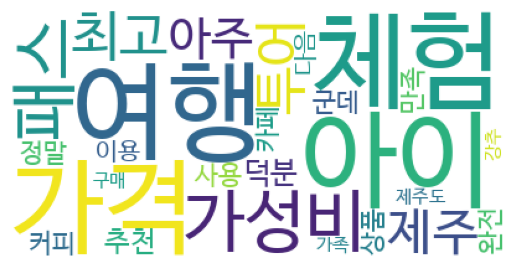

In [31]:
text = ",".join(topics_list)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off") #x,y축 범례를 없애줌
plt.show()

In [35]:
wordcloud.words_

{'여행': 1.0,
 '아이': 1.0,
 '체험': 1.0,
 '가격': 1.0,
 '가성': 0.5,
 '패스': 0.5,
 '최고': 0.5,
 '투어': 0.5,
 '제주': 0.5,
 '아주': 0.5,
 '덕분': 0.5,
 '추천': 0.5,
 '사용': 0.5,
 '커피': 0.5,
 '카페': 0.5,
 '만족': 0.5,
 '완전': 0.5,
 '정말': 0.5,
 '군데': 0.5,
 '상품': 0.5,
 '이용': 0.5,
 '다음': 0.5,
 '제주도': 0.5,
 '구매': 0.5,
 '가족': 0.5,
 '강추': 0.5}

In [32]:
list_text = []
for x in range(len(list_positive)):
    text = tokenizer(list_positive[x])
    list_text.append(text)
list_text

[['가격',
  '군데',
  '다만',
  '일찍',
  '영업',
  '시간',
  '제대로',
  '표기',
  '헛걸음',
  '경우',
  '따로따로',
  '구매',
  '이순신',
  '광장',
  '먹거리',
  '투어',
  '패스',
  '간격',
  '기네',
  '시간',
  '여행',
  '생각',
  '일찍',
  '곳도',
  '시간',
  '계획'],
 ['투어',
  '패스',
  '대체로',
  '보드게임',
  '카페',
  '주말',
  '사용',
  '능이',
  '안성식',
  '가격',
  '만원',
  '점점',
  '사용',
  '매장'],
 ['카페', '영업', '군데', '테디베어', '박물관', '초등학교', '저학년', '아이', '수준', '다소'],
 ['까페', '제대로', '확인', '업체', '선정'],
 ['카페', '미리', '영업', '확인', '가세'],
 ['가격', '이용', '장점', '이왕이면', '여러', '군데', '바다', '카페'],
 ['여수', '패스', '강력', '추천', '절약', '가능'],
 ['여수', '패스', '강력', '추천', '절약', '가능'],
 ['여러가지', '활동', '하나', '가격', '이용', '여수', '당일치기', '간다'],
 ['몇개', '체험'],
 ['테디베어',
  '윈터',
  '해도',
  '비용',
  '다만',
  '링크',
  '장소',
  '티맵',
  '바로',
  '장소',
  '실패',
  '주소',
  '복사',
  '티맵',
  '검색'],
 ['테디베어',
  '윈터',
  '해도',
  '비용',
  '다만',
  '링크',
  '장소',
  '티맵',
  '바로',
  '장소',
  '실패',
  '주소',
  '복사',
  '티맵',
  '검색'],
 ['사용', '덕분', '여수', '다음', '여행', '한번', '사용'],
 [],
 ['준비', '점포', '가격', '대비'],
 ['가격', 

In [33]:
list_text = [element for sublist in list_text for element in sublist]
list_text

['가격',
 '군데',
 '다만',
 '일찍',
 '영업',
 '시간',
 '제대로',
 '표기',
 '헛걸음',
 '경우',
 '따로따로',
 '구매',
 '이순신',
 '광장',
 '먹거리',
 '투어',
 '패스',
 '간격',
 '기네',
 '시간',
 '여행',
 '생각',
 '일찍',
 '곳도',
 '시간',
 '계획',
 '투어',
 '패스',
 '대체로',
 '보드게임',
 '카페',
 '주말',
 '사용',
 '능이',
 '안성식',
 '가격',
 '만원',
 '점점',
 '사용',
 '매장',
 '카페',
 '영업',
 '군데',
 '테디베어',
 '박물관',
 '초등학교',
 '저학년',
 '아이',
 '수준',
 '다소',
 '까페',
 '제대로',
 '확인',
 '업체',
 '선정',
 '카페',
 '미리',
 '영업',
 '확인',
 '가세',
 '가격',
 '이용',
 '장점',
 '이왕이면',
 '여러',
 '군데',
 '바다',
 '카페',
 '여수',
 '패스',
 '강력',
 '추천',
 '절약',
 '가능',
 '여수',
 '패스',
 '강력',
 '추천',
 '절약',
 '가능',
 '여러가지',
 '활동',
 '하나',
 '가격',
 '이용',
 '여수',
 '당일치기',
 '간다',
 '몇개',
 '체험',
 '테디베어',
 '윈터',
 '해도',
 '비용',
 '다만',
 '링크',
 '장소',
 '티맵',
 '바로',
 '장소',
 '실패',
 '주소',
 '복사',
 '티맵',
 '검색',
 '테디베어',
 '윈터',
 '해도',
 '비용',
 '다만',
 '링크',
 '장소',
 '티맵',
 '바로',
 '장소',
 '실패',
 '주소',
 '복사',
 '티맵',
 '검색',
 '사용',
 '덕분',
 '여수',
 '다음',
 '여행',
 '한번',
 '사용',
 '준비',
 '점포',
 '가격',
 '대비',
 '가격',
 '대비',
 '커피',
 '투어',
 '번창',
 '가격',
 '대비',
 '만족',


In [34]:
from collections import Counter
word_counts = Counter(list_text)
cafe_count = word_counts["카페"]

cafe_count

2436

In [36]:
len(list_text)

154584

## Reference

https://github.com/Seokii/Korean_NLP_Tutorial